In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# 1. A Simple Example to Start

## Given:

Four points on a coordinate system with their x and y coordinates.

## Problem Statement:

Find the location of a point X that the total distance from point X to other four points is minimum.   


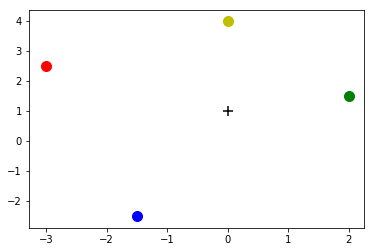

In [4]:
from pylab import *

x = [0,2,-3,-1.5,0]
y = [4,1.5,2.5,-2.5,1]
color=['y','g','r','b','k']
markers = ['o','+']
for i in range(0,len(x)):
    if i<len(x)-1:
        scatter(x[i],y[i], s=100 ,marker=markers[0], c=color[i])
    else:
        scatter(x[i],y[i], s=100 ,marker=markers[1], c=color[i])

show()

## LETS FIRST THINK in ENGLISH: 

 1. What is our objective function? 

2. What are our constraints? 

## TIME for MATH :)

### Sets:

- $E$: Set of Existing Points

In [ ]:
E = {'red','yellow','green','blue'}

In [ ]:
E

- $P$: Set of Potential Points

In [ ]:
P = {'black'}

In [ ]:
P

### Parameters:

What are the constants (knowns) of this problem?
    - The locations of the existing points.

IN MATH;

$\bar{x}_e, \forall e\in E$: is the x-coordinate of existing point $e$, 

$\bar{y}_e, \forall e\in E$: is the y-coordinate of existing point $e$.    

In [ ]:
xbar = {}
ybar = {}
xbar['red'] = -3
ybar['red'] = 2.5
xbar['yellow'] = 0 
ybar['yellow'] = 4
xbar['green'] = 2
ybar['green'] = 1.5
xbar['blue'] = -1.5
ybar['blue'] = -2.5

### Variables:

What are the decisions of this problem?
    - The location of the potential point.

IN MATH;

$x_{p}, \forall p\in P$: is the decision variable for x-coordinate of potential point $p$,

$y_{p}, \forall p\in P$: is the decision variable for y-coordinate of potential point $p$.

Since there is only one element in set P, we will use x and y to represent the decision variables for this problem.

### Objective Function:

Assumption: Assume that a function $F(\bar{x},\bar{y},x,y)$ defines the distance between two points.

IN MATH;

$\sum_{e \in E} F(x,y,\bar{x}_e,\bar{y}_e)$

### MODEL:

min $\sum_{e \in E} F(x,y,\bar{x}_e,\bar{y}_e)$

#### Case 1:

The objective is to minimize the total Euclidean distance.

#### MODEL:

min $\sum_{e \in E} \sqrt{(x-\bar{x}_{e})^2+(y-\bar{y}_{e})^2}$

THIS IS AN EXAMPLE OF NONLINEAR PROGRAMMING ! 

#### Case 2:

The objective is to minimize the total Rectilinear (Manhattan) distance.

$\sum_{e \in E} F(x,y,\bar{x}_e,\bar{y}_e) = \sum_{e \in E} |(x-\bar{x}_{e})|+|(y-\bar{y}_{e})|$  

#### MODEL:

Additional Variables for Linearization:

$m_{e}^{+}, \forall e\in E$,

$m_{e}^{-}, \forall e\in E$,

$n_{e}^{+}, \forall e\in E$,

$n_{e}^{-}, \forall e\in E$.

min $\sum_{e \in E} m_{e}^{+}+m_{e}^{-}+n_{e}^{+}+n_{e}^{-}$

s.t.

$x + m_{e}^{+} - m_{e}^{-} = \bar{x}_{e}$ $\forall e \in E$

$y + n_{e}^{+} - n_{e}^{-} = \bar{y}_{e}$ $\forall e \in E$

$m_{e}^{+}>=0,     \forall e\in E$,

$m_{e}^{-}>=0,     \forall e\in E$,

$n_{e}^{+}>=0,     \forall e\in E$,

$n_{e}^{-}>=0,     \forall e\in E$.



THIS IS AN EXAMPLE OF LINEAR PROGRAMMING !

## What have we gone through so far?

1. Sets
2. Parameters
3. Continous Decision Variables
4. Objective Functions
5. Linear Programming vs. NonLinear Programming
6. BONUS: Linearization of Absolute Value Function :)

## QUICK INTRO TO PULP

In [ ]:
from pulp import *

In [ ]:
# Generate the Variables via LpVariable()
x = LpVariable("x",None,None,LpContinuous)
y = LpVariable("y",None,None,LpContinuous)
mePlus = {}
for e in E:
    mePlus[e]= LpVariable("mePlus_%s"%(e),0,None,LpContinuous)
meMinus = {}
for e in E:
    meMinus[e]= LpVariable("meMinus%s"%(e),0,None,LpContinuous)
nePlus = {}
for e in E:
    nePlus[e]= LpVariable("nePlus_%s"%(e),0,None,LpContinuous)
neMinus = {}
for e in E:
    neMinus[e]= LpVariable("neMinus_%s"%(e),0,None,LpContinuous)

In [ ]:
### Generate Problem&Solver via LpProblem()
prob = LpProblem("Training Q1",LpMinimize)

In [ ]:
### Adding Objective Function to Prob
prob += lpSum([mePlus[e]+meMinus[e]+nePlus[e]+neMinus[e] for e in E])

In [ ]:
## Set Linearization constraints
for e in E:
    prob += x+mePlus[e]-meMinus[e]==xbar[e]
for e in E:
    prob += y+nePlus[e]-neMinus[e]==ybar[e]

In [ ]:
import time

start = time.time()
## Solve model
prob.solve()
end = time.time()
print(pulp.LpStatus[prob.status], "solution in: ", float(end - start), "sec")

In [ ]:
## Print variables with value greater than 0 
for v in prob.variables():
        print(v.name, "=", v.varValue)

# Print The optimal objective function value
print("Total Rectilinear Distance = ", pulp.value(prob.objective))

# 2. First Extension of the Problem

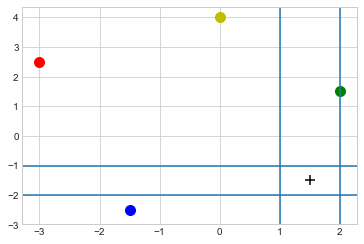

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.axvline(x=1)
plt.axvline(x=2)
plt.axhline(y=-1)
plt.axhline(y=-2)
#plt.plot(0, a, '-g')  # solid green
x = [0,2,-3,-1.5,1.5]
y = [4,1.5,2.5,-2.5,-1.5]
color=['y','g','r','b','k']
markers = ['o','+']
for i in range(0,len(x)):
    if i<len(x)-1:
        scatter(x[i],y[i], s=100 ,marker=markers[0], c=color[i])
    else:
        scatter(x[i],y[i], s=100 ,marker=markers[1], c=color[i])

#plot(a, b)

show()


## Problem Statement:

Find the location of a point X within the rectangle in the figure that the total rectilinear distance from point X to other four points is minimum.

## In ENGLISH :) 

 1. What is our objective function? 

2. What are our constraints? 

### MODEL:

min $\sum_{e \in E} m_{e}^{+}+m_{e}^{-}+n_{e}^{+}+n_{e}^{-}$

s.t.

$x + m_{e}^{+} - m_{e}^{-} = \bar{x}_{e}$ $\forall e \in E$

$y + n_{e}^{+} - n_{e}^{-} = \bar{y}_{e}$ $\forall e \in E$

$m_{e}^{+}>=0,     \forall e\in E$,

$m_{e}^{-}>=0,     \forall e\in E$,

$n_{e}^{+}>=0,     \forall e\in E$,

$n_{e}^{-}>=0,     \forall e\in E$,

$x <= 2$,

$x >= 1$,

$y <= -1$,

$y >= -2$.



## LET'S SOLVE THIS MODEL TOGETHER !

In [ ]:
# Generate the Variables via LpVariable()

### Generate Problem&Solver via LpProblem()

### Adding Objective Function to Prob

## Set Linearization constraints


In [ ]:
## New Constraints:



In [ ]:
import time

start = time.time()
## Solve model
prob.solve()
end = time.time()
print(pulp.LpStatus[prob.status], "solution in: ", float(end - start), "sec")

In [ ]:
## Print optimal values for x and y. 

# Print The optimal objective function value


## What have we gone through so far?

1. Using Pulp to solve Linear Programs
2. Modelling Set of Constraints
3. Bounded Feasible Solution Space

# 3. Second Extension of the Problem

## Problem Statement:

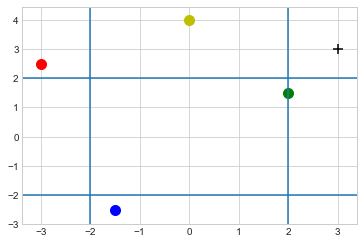

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.axvline(x=-2)
plt.axvline(x=2)
plt.axhline(y=2)
plt.axhline(y=-2)
#plt.plot(0, a, '-g')  # solid green
x = [0,2,-3,-1.5,3]
y = [4,1.5,2.5,-2.5,3]
color=['y','g','r','b','k']
markers = ['o','+']
for i in range(0,len(x)):
    if i<len(x)-1:
        scatter(x[i],y[i], s=100 ,marker=markers[0], c=color[i])
    else:
        scatter(x[i],y[i], s=100 ,marker=markers[1], c=color[i])

#plot(a, b)

show()


Find the location of the point X outside the rectangle to minimize the total rectilinear distance from the point $X$ to $\bar{X}_{e}$.

## AGAIN, VERBALLY !

 1. What is our objective function? 

2. What are our constraints? 

## TIME for MATH :)

### Sets:

- $E$: Set of Existing Points

### Parameters:

What are the constants (knowns) of this problem?
    - The locations of the existing points.
    - ?

### Variables:

    - Coordinates of the potential point.
    - Variables for Linearization
    - ?

### Objective Function:

Will there be any changes? Or just the same?

### Constraints:

- Constraints for Linearization
- How should we define the feasible solution space?

### SOMETHING NEW: EITHER-OR CONSTRAINTS and BINARY VARIABLES!!

Complicated Relationship: Big-M and its company BINARY VARIABLE

BINARY VARIABLE is an integer variable that can only take 0 or 1 as a value. 

Big-M is a sufficiently big number that helps to relax some of the conflicting constraints.

#### UPDATING THE MODEL to APPLY EITHER-OR CONSTRAINTS

NEW SET;

$R$: Set of the Rectangle Edges

NEW PARAMETER:

$M$: Big-M

OBJECTIVE FUNCTION will be the same.

min $\sum_{e \in E} m_{e}^{+}+m_{e}^{-}+n_{e}^{+}+n_{e}^{-}$

Constraints:(LINERARIZATION)

$x + m_{e}^{+} - m_{e}^{-} = \bar{x}_{e}$ $\forall e \in E$

$y + n_{e}^{+} - n_{e}^{-} = \bar{y}_{e}$ $\forall e \in E$

$m_{e}^{+}>=0,     \forall e\in E$,

$m_{e}^{-}>=0,     \forall e\in E$,

$n_{e}^{+}>=0,     \forall e\in E$,

$n_{e}^{-}>=0,     \forall e\in E$,

Constraints: (EITHER-OR CONSTRAINTS)

$x <= -2 + (M a_{r}), r = 1$

$x >= 2 - (M a_{r}), r = 2$

$y <= -2 + (M a_{r}), r = 3$

$y >= 2 - (M a_{r}), r = 4$

$\sum_{r \in R} a_{r} = 3$

In [ ]:
M = 10 #Big-M
# Generate the Variables via LpVariable()
x = LpVariable("x",None,None,LpContinuous)
y = LpVariable("y",None,None,LpContinuous)
mePlus = {}
for e in E:
    mePlus[e]= LpVariable("mePlus_%s"%(e),0,None,LpContinuous)
meMinus = {}
for e in E:
    meMinus[e]= LpVariable("meMinus%s"%(e),0,None,LpContinuous)
nePlus = {}
for e in E:
    nePlus[e]= LpVariable("nePlus_%s"%(e),0,None,LpContinuous)
neMinus = {}
for e in E:
    neMinus[e]= LpVariable("neMinus_%s"%(e),0,None,LpContinuous)
### Generate Problem&Solver via LpProblem()
prob = LpProblem("Training Q3",LpMinimize)
### Adding Objective Function to Prob
prob += lpSum([mePlus[e]+meMinus[e]+nePlus[e]+neMinus[e] for e in E])
## Set Linearization constraints
for e in E:
    prob += x+mePlus[e]-meMinus[e]==xbar[e]
for e in E:
    prob += y+nePlus[e]-neMinus[e]==ybar[e]

In [ ]:
## Generate a Set for Rectangle Edges


In [ ]:
## Generate the Binary Variables



In [ ]:
## Set Big-M


In [ ]:
## Set Either-Or Constraints


In [ ]:
import time

start = time.time()
## Solve model
prob.solve()
end = time.time()
print(pulp.LpStatus[prob.status], "solution in: ", float(end - start), "sec")

In [ ]:
## Print variables with value greater than 0 
for v in prob.variables(): 
    print(v.name, "=", v.varValue)

# Print The optimal objective function value
print("Total Rectilinear Distance = ", pulp.value(prob.objective))

This model is called MIXED INTEGER LINEAR PROGRAMMING (MILP), which has both integer and continuous variables !!

### What if we were asked to minimize the Euclidean distance for this problem?

Then the model would be a MIXED INTEGER NONLINEAR PROGRAMMING (MINLP)

A general preference;

LP -> MILP -> ILP -> NLP -> MINLP 

## What have we gone through so far?

1. Modelling a MILP 
2. Modelling with Either-Or Constraints
3. MINLP

## IT'S YOUR TURN NOW !!

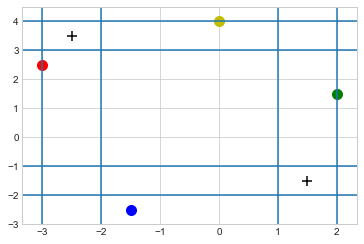

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.axvline(x=1)
plt.axvline(x=2)
plt.axhline(y=-1)
plt.axhline(y=-2)
plt.axvline(x=-3)
plt.axvline(x=-2)
plt.axhline(y=4)
plt.axhline(y=3)
#plt.plot(0, a, '-g')  # solid green
x = [0,2,-3,-1.5,1.5,-2.5]
y = [4,1.5,2.5,-2.5,-1.5,3.5]
color=['y','g','r','b','k','k']
markers = ['o','+']
for i in range(0,len(x)):
    if i<len(x)-2:
        scatter(x[i],y[i], s=100 ,marker=markers[0], c=color[i])
    else:
        scatter(x[i],y[i], s=100 ,marker=markers[1], c=color[i])

#plot(a, b)

show()


Find the location of the point X inside one of the rectangles with  black cross to minimize the total rectilinear distance from the point $X$ to $\bar{X}_{e}$.

FIRST: THINK about the OBJECTIVE FUNCTION and CONSTRAINTS.

SECOND: THINK about the SETS, PARAMETERS and VARIABLES.

THIRD: WRITE DOWN YOUR MODEL ON A PIECE OF PAPER.

FOURTH: CODE !!

In [ ]:
# Sets


In [ ]:
# Parameters
xbar = {}
ybar = {}
xbar['red'] = -3
ybar['red'] = 2.5
xbar['yellow'] = 0 
ybar['yellow'] = 4
xbar['green'] = 2
ybar['green'] = 1.5
xbar['blue'] = -1.5
ybar['blue'] = -2.5
M = 10

In [ ]:
# Variables


In [ ]:
### Generate Problem&Solver via LpProblem()
prob = LpProblem("Training Q4",LpMinimize)

In [ ]:
# Objective Function


In [ ]:
# Constraints
## Linearization
for e in E:
    prob += x+mePlus[e]-meMinus[e]==xbar[e]
for e in E:
    prob += y+nePlus[e]-neMinus[e]==ybar[e]
## Defining Feasible Solution Space



In [ ]:
import time

start = time.time()
## Solve model
prob.solve()
end = time.time()
print(pulp.LpStatus[prob.status], "solution in: ", float(end - start), "sec")

In [ ]:
## Print all optimal variable values 




## WELL DONE :)

- You have modelled a MILP by using either-or constraints and Big-M.

- You used CBC solver through Pulp to solve the model and find the optimal solution. 

## Something to try at home, if you are interested. 

Consider the problem Q3 (with the big rectangle).

- Objective is the same. Minimizing the total rectilinear distance.

- There is an additional constraint. Travelling through the rectangle is forbidden this time. 

- You can send me your ideas or solution through email, happy to look at and answer any questions.

## What have we gone through so far?

1. Defining Sets, Parameters and Variables

    - Continuous Variables vs. Integer Variables
    

2. Modelling

    - LP vs. NLP
    
    - MILP vs. MINLP.
    

3. Defining Objectives


4. Defining Solution Spaces

    - Either-OR constraints and Big-M
    
    
5. Using Pulp to solve Linear Models


6. BONUS: Linearization of Absolute Value Function

# 4. A More TESCO-ish Problem: Assignment Problem

## Problem Statement: 

- Assume that there is a set of stores that has to be assigned to a set of uncapacitated warehouses to fulfill their daily demand in a return of an assignment cost. Additionally, there is a cost to run a warehouse.

- It is also assumed that a store cannot be assigned to more than one warehouse.


### Sets:

$I$: Set of Stores
    
$J$: Set of Warehouses

In [ ]:
I = {'S1','S2','S3','S4','S5','S6','S7','S8','S9','S10'}
J = {'W1','W2','W3','W4','W5'}

### Parameters:

$c_{ij}$: Cost to assign store $i$ to warehouse $j$.

$p_{j}$: Cost to run a warehouse $j$.    

In [ ]:
c = {}
c['S1','W1']=10
c['S1','W2']=7
c['S1','W3']=5
c['S1','W4']=8
c['S1','W5']=12
c['S2','W1']=6
c['S2','W2']=9
c['S2','W3']=13
c['S2','W4']=7
c['S2','W5']=4
c['S3','W1']=11
c['S3','W2']=3
c['S3','W3']=6
c['S3','W4']=5
c['S3','W5']=12
c['S4','W1']=8
c['S4','W2']=4
c['S4','W3']=7
c['S4','W4']=6
c['S4','W5']=9
c['S5','W1']=14
c['S5','W2']=13
c['S5','W3']=12
c['S5','W4']=11
c['S5','W5']=10
c['S6','W1']=17
c['S6','W2']=18
c['S6','W3']=19
c['S6','W4']=20
c['S6','W5']=21
c['S7','W1']=100
c['S7','W2']=20
c['S7','W3']=5
c['S7','W4']=40
c['S7','W5']=100
c['S8','W1']=45
c['S8','W2']=30
c['S8','W3']=35
c['S8','W4']=25
c['S8','W5']=40
c['S9','W1']=10
c['S9','W2']=40
c['S9','W3']=50
c['S9','W4']=30
c['S9','W5']=20
c['S10','W1']=15
c['S10','W2']=30
c['S10','W3']=23
c['S10','W4']=45
c['S10','W5']=11
p = {}
p['W1']=100
p['W2']=15
p['W3']=200
p['W4']=25
p['W5']=30
M = len(I)+1

### Variables: 

$x_{ij}$: Takes $1$, if store $i$ is assigned to warehouse $j$. Otherwise, $0$.

$y_{j}$: Takes $1$, if warehouse $j$ is working.

In [ ]:
# Generate Variables in Pulp
x = {}
for i in I:
    for j in J:
        x[i,j]= LpVariable("x_%s_%s"%(i,j),0,1,LpInteger)
y = {}
for j in J:
    y[j] = LpVariable("y_%s"%(j),0,1,LpInteger)


In [ ]:
# Generate Problem/Solver
prob = LpProblem("Training Q5",LpMinimize)

### Objective Function:

$$\min\sum_{i\in I}\sum_{j\in J} c_{ij}x_{ij} + \sum_{j\in J} p_{j}y_{j}$$

In [ ]:
# Add the Objective Function
prob += lpSum(c[i,j]*x[i,j] for i in I for j in J) + lpSum(p[j]*y[j] for j in J)

$$ \sum_{j \in J} x_{ij} = 1,\forall\:i \in I$$

In [ ]:
# Add Constraints #1
for i in I:
    prob += lpSum(x[i,j] for j in J) == 1

$$ \sum_{i \in I} x_{ij} = M y_{j},\forall\:j \in J$$

In [ ]:
# Add Constraint #2
for j in J:
    prob += lpSum(x[i,j] for i in I) <= M * y[j] 

$$ x_{ij} \in \{0,1\}, \forall\:i \in I, j \in J$$
$$ y_{j} \in \{0,1\}, \forall\:j \in J$$

In [ ]:
import time

start = time.time()
## Solve model
prob.solve()
end = time.time()
print(pulp.LpStatus[prob.status], "solution in: ", float(end - start), "sec")

In [ ]:
## Print variables with value greater than 0 
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)

# Print The optimal objective function value
print("Total Cost = ", pulp.value(prob.objective))

# 5. Extended TESCO-ish Problem: Stochastic Assignment Problem

## LET'S DO THIS TOGETHER !!

## Problem Statement: 

- Assume that there is a set of stores that has to be assigned to a set of uncapacitated warehouses to fulfill their daily demand in a return of an assignment cost. Additionally, there is a cost to run a warehouse.

- It is also assumed that a store cannot be assigned to more than one warehouse.

- In this Dreamland, there are two scenarios for weather, which are sunny and rainy. With $60$% probability the weather is sunny, and with $40$% probability the weather is rainy.

- If the weather is rainy, the cost of assigning stores to warehouses changes.  

### Objective Function:

HINT: We need to minimize the expected assignment cost, plus the cost of running a warehouse. 

HINT: Expected value (of a discrete random variable)

 $$E(X) = \sum x P(X = x)$$

### Sets:

$I$: Set of Stores
    
$J$: Set of Warehouses
    
$S$: Set of Scenarios

In [ ]:
I = {'S1','S2','S3','S4','S5','S6','S7','S8','S9','S10'}
J = {'W1','W2','W3','W4','W5'}
S = {'Sunny', 'Rainy'}

### Parameters:

$c_{sij}$: Cost to assign store $i$ to warehouse $j$ in scenario $s$.

$p_{j}$: Cost to run a warehouse $j$.    

In [ ]:
pr = {}
pr['Sunny'] = 0.6
pr['Rainy'] = 0.4
c = {}
c['Sunny','S1','W1']=10
c['Sunny','S1','W2']=7
c['Sunny','S1','W3']=5
c['Sunny','S1','W4']=8
c['Sunny','S1','W5']=12
c['Sunny','S2','W1']=6
c['Sunny','S2','W2']=9
c['Sunny','S2','W3']=13
c['Sunny','S2','W4']=7
c['Sunny','S2','W5']=4
c['Sunny','S3','W1']=11
c['Sunny','S3','W2']=3
c['Sunny','S3','W3']=6
c['Sunny','S3','W4']=5
c['Sunny','S3','W5']=12
c['Sunny','S4','W1']=8
c['Sunny','S4','W2']=4
c['Sunny','S4','W3']=7
c['Sunny','S4','W4']=6
c['Sunny','S4','W5']=9
c['Sunny','S5','W1']=14
c['Sunny','S5','W2']=13
c['Sunny','S5','W3']=12
c['Sunny','S5','W4']=11
c['Sunny','S5','W5']=10
c['Sunny','S6','W1']=17
c['Sunny','S6','W2']=18
c['Sunny','S6','W3']=19
c['Sunny','S6','W4']=20
c['Sunny','S6','W5']=21
c['Sunny','S7','W1']=100
c['Sunny','S7','W2']=20
c['Sunny','S7','W3']=5
c['Sunny','S7','W4']=40
c['Sunny','S7','W5']=100
c['Sunny','S8','W1']=45
c['Sunny','S8','W2']=30
c['Sunny','S8','W3']=35
c['Sunny','S8','W4']=25
c['Sunny','S8','W5']=40
c['Sunny','S9','W1']=10
c['Sunny','S9','W2']=40
c['Sunny','S9','W3']=50
c['Sunny','S9','W4']=30
c['Sunny','S9','W5']=20
c['Sunny','S10','W1']=15
c['Sunny','S10','W2']=30
c['Sunny','S10','W3']=23
c['Sunny','S10','W4']=45
c['Sunny','S10','W5']=11
c['Rainy','S1','W1']=101
c['Rainy','S1','W2']=107
c['Rainy','S1','W3']=105
c['Rainy','S1','W4']=108
c['Rainy','S1','W5']=121
c['Rainy','S2','W1']=60
c['Rainy','S2','W2']=90
c['Rainy','S2','W3']=130
c['Rainy','S2','W4']=70
c['Rainy','S2','W5']=40
c['Rainy','S3','W1']=11
c['Rainy','S3','W2']=30
c['Rainy','S3','W3']=60
c['Rainy','S3','W4']=50
c['Rainy','S3','W5']=120
c['Rainy','S4','W1']=80
c['Rainy','S4','W2']=40
c['Rainy','S4','W3']=70
c['Rainy','S4','W4']=60
c['Rainy','S4','W5']=90
c['Rainy','S5','W1']=43
c['Rainy','S5','W2']=63
c['Rainy','S5','W3']=52
c['Rainy','S5','W4']=21
c['Rainy','S5','W5']=80
c['Rainy','S6','W1']=77
c['Rainy','S6','W2']=48
c['Rainy','S6','W3']=59
c['Rainy','S6','W4']=90
c['Rainy','S6','W5']=61
c['Rainy','S7','W1']=100
c['Rainy','S7','W2']=70
c['Rainy','S7','W3']=500
c['Rainy','S7','W4']=40
c['Rainy','S7','W5']=100
c['Rainy','S8','W1']=85
c['Rainy','S8','W2']=40
c['Rainy','S8','W3']=35
c['Rainy','S8','W4']=28
c['Rainy','S8','W5']=41
c['Rainy','S9','W1']=100
c['Rainy','S9','W2']=87
c['Rainy','S9','W3']=76
c['Rainy','S9','W4']=39
c['Rainy','S9','W5']=51
c['Rainy','S10','W1']=250
c['Rainy','S10','W2']=100
c['Rainy','S10','W3']=130
c['Rainy','S10','W4']=150
c['Rainy','S10','W5']=310
p = {}
p['W1']=100
p['W2']=15
p['W3']=200
p['W4']=25
p['W5']=30
M = len(I)+1

### Variables: 

$x_{sij}$: Takes $1$, if store $i$ is assigned to warehouse $j$ in scenario $s$. Otherwise, $0$.

$y_{j}$: Takes $1$, if warehouse $j$ is working.

In [ ]:
# Generate Variables in Pulp


In [ ]:
# Generate Problem/Solver
prob = LpProblem("Training Q5",LpMinimize)

In [ ]:
# Add the Objective Function


In [ ]:
# Add constraints


In [ ]:
import time

start = time.time()
## Solve model
prob.solve()
end = time.time()
print(pulp.LpStatus[prob.status], "solution in: ", float(end - start), "sec")

In [ ]:
## Print variables with value greater than 0 
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)

# Print The optimal objective function value
print("Total Cost = ", pulp.value(prob.objective))

We just modelled a stochastic problem as a TWO STAGE STOCHASTIC PROGRAMMING, and solved it by using a linear solver!

# We reached the end of our training today.

# THINGS THAT WE HAD COVERED TODAY

1. Sets, Parameters and Variables
    - Continuous Variables and Integer Variables


2. Objective Functions


3. Constraint Sets
    - Unbounded and Bounded Feasible Solution Space
    

4. Linear Programming vs. NonLinear Programming
    - LP, NLP, MILP, MINLP
    

5. Using Pulp to solve Linear Programming Models


6. Modelling with Either-Or Constraints and Big-M.


7. Integer Linear Programming (ILP)


8. Deterministic and Stochastic Problems

# IF YOU ARE STILL INTERESTED, PLEASE SEND ME YOUR MODELLING THOUGHTS AND SOLUTIONS FOR Q3, WHERE TRAVELLING THROUGH THE RECTANGLE IS FORBIDDEN.